Total Games :  2217998757  Indie :  731152113  Action  :  1512554753  Casual  :  240120444  Adventure  :  550881684  Strategy:  477453337 RPG  :  459321917  Simulation  :  273863846  Early Access :  162389801  Free To Play :  574553200  Sports :  59135546  Racing :  50611953  Massively Multiplayer :   229371663


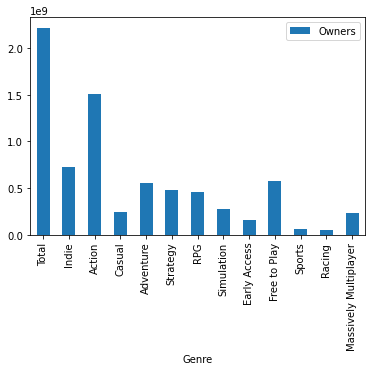

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as ply
import seaborn as sns
import project_functions as pf
## Importing using the relative path kept giving errors
df = pf.load_and_process('../../data/raw/games-features.csv')
df2 = pf.Column_var_sort(df,'Owners',False)
dfrated = df2[df2.Rating != 0]
dfrindie = dfrated[dfrated.GenreIsIndie == True]
dfraction = dfrated[dfrated.GenreIsAction == True]
dfrcasual = dfrated[dfrated.GenreIsCasual == True]
indiemean = dfrindie['Rating'].mean()
actionmean = dfraction['Rating'].mean()
casualmean = dfrcasual['Rating'].mean()
pf.plotOwners(df)

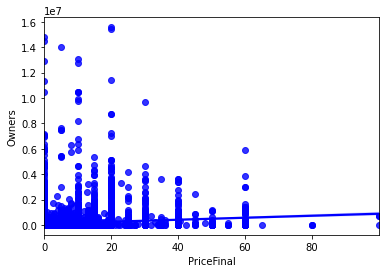

In [3]:
dfo = df[(df["Owners"]<20000000)&(df["PriceFinal"]<100)]
pricevowners = sns.regplot(data=dfo,x="PriceFinal",y="Owners", color='blue')

<seaborn.axisgrid.FacetGrid object at 0x0000020A0073F970> <seaborn.axisgrid.FacetGrid object at 0x0000020A0073F730> <seaborn.axisgrid.FacetGrid object at 0x0000020A0073FB20> <seaborn.axisgrid.FacetGrid object at 0x0000020A007276D0>


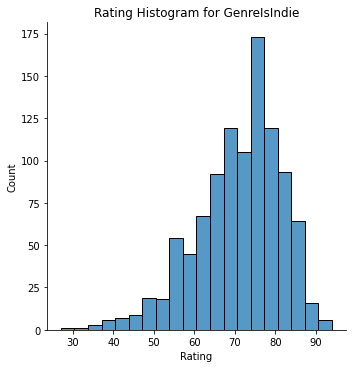

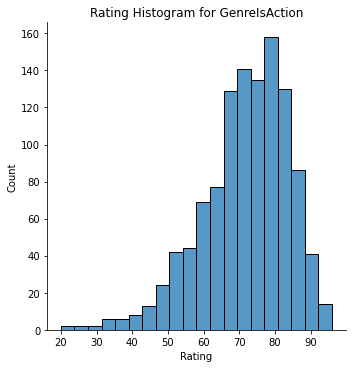

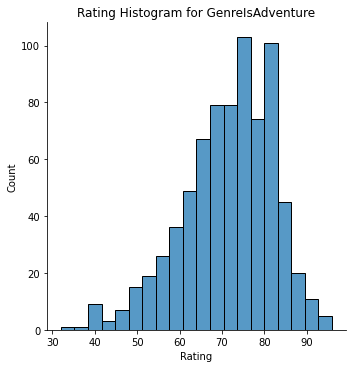

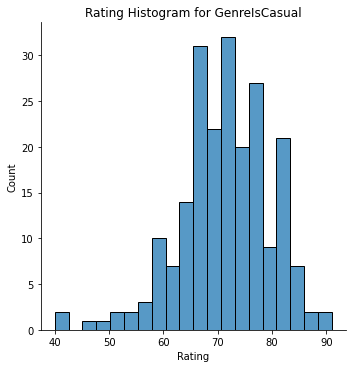

In [13]:
def genreratingplot(data1,genre):
    dfrated = data1.loc[lambda x: x['Rating']>0]
    genresplit = dfrated[dfrated[genre] == True]
    genreplot = sns.displot(x="Rating", data=genresplit, bins = 20).set(title=("Rating Histogram for "+genre))
    return genreplot
indie = genreratingplot(df,"GenreIsIndie")
action = genreratingplot(df,"GenreIsAction")
adventure = genreratingplot(df,"GenreIsAdventure")
casual = genreratingplot(df,"GenreIsCasual")
print(indie,action,adventure,casual)

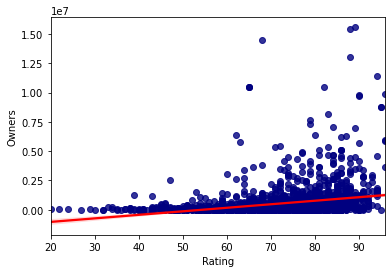

In [5]:
ratingvowners = sns.regplot(data=dfrated[dfrated["Owners"]<20000000],x="Rating",y="Owners", scatter_kws={"color": "navy"}, line_kws={"color": "red"})

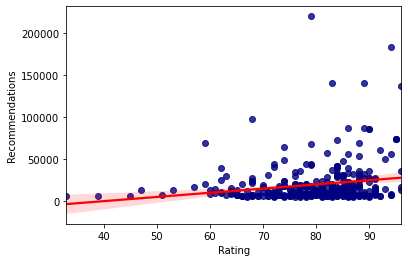

In [6]:
ratingvrecommend = sns.regplot(data=dfrated[(dfrated["Recommendations"]<300000)&(dfrated["Recommendations"]>5000)],x="Rating",y="Recommendations", scatter_kws={"color": "navy"}, line_kws={"color": "red"})